In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

In [59]:
#leer archivos de Excel: HR_TP_FINAL.xlsx, hoja: TRAIN
Tabla_Train = pd.read_excel(r'D:\LNAB\3er Trimestre\TP TIC Python 2.xlsx', sheet_name='TRAIN')
print("Column headings:")
print(Tabla_Train.columns)

Column headings:
Index(['ID_EMPLEADO', 'NiveldeSatisfaccion', 'UltimaEvaluacion',
       'CantidaddeProyectos', 'PromediodeHorasMensuales',
       'AntiguedadenEmpresa', 'SufrioAccidenteLaboral',
       'PromocionadoenUltimos5años', 'Departmento', 'Salario', 'SalarioN',
       'Sexo', 'DistanciaCasaTrabajo', 'var', 'Nivel de Conformidad',
       'Nivel de Conformidad.1'],
      dtype='object')


In [60]:
#leer archivos de Excel: HR_TP_FINAL.xlsx, hoja: TRAIN_TARGET
Tabla_Train_Target = pd.read_excel(r'D:\LNAB\3er Trimestre\TP TIC Python 2.xlsx', sheet_name='TRAIN_TARGET')
print("Column headings:")
print(Tabla_Train_Target.columns)

Column headings:
Index(['ID_EMPLEADO', 'Abandona', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')


In [61]:
#leer archivos de Excel: HR_TP_FINAL.xlsx, hoja: TEST
Tabla_Apredecir = pd.read_excel(r'D:\LNAB\3er Trimestre\TP TIC Python 2.xlsx', sheet_name='TEST')
print("Column headings:")
print(Tabla_Apredecir.columns)

Column headings:
Index(['ID_EMPLEADO', 'NiveldeSatisfaccion', 'UltimaEvaluacion',
       'CantidaddeProyectos', 'PromediodeHorasMensuales',
       'AntiguedadenEmpresa', 'SufrioAccidenteLaboral',
       'PromocionadoenUltimos5años', 'Departmento', 'Salario', 'SalarioN',
       'Sexo', 'DistanciaCasaTrabajo', 'Var', 'Nivel de Conformidad',
       'Nivel de Conformidad.1'],
      dtype='object')


In [62]:
Tabla_Modelar = pd.merge(Tabla_Train, Tabla_Train_Target, on='ID_EMPLEADO', how='outer')
Tabla_Modelar.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,...,DistanciaCasaTrabajo,var,Nivel de Conformidad,Nivel de Conformidad.1,Abandona,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,0.38,0.53,2,157,3,0,0,Ventas,Bajo,...,66.0,-0.0360,1.194599,1.0,1,NaN,NaN,NaN,NaN,NaN
1,2,0.80,0.86,5,262,6,0,0,Ventas,Medio,...,70.5,5.9895,5.980540,6.0,1,NaN,NaN,NaN,NaN,NaN
2,3,0.11,0.88,7,272,4,0,0,Ventas,Medio,...,15.0,2.2150,2.982526,3.0,1,NaN,NaN,1,abandonan,2783.0
3,4,0.72,0.87,5,223,5,0,0,Ventas,Bajo,...,114.0,2.3560,3.094519,3.0,1,NaN,NaN,0,no abandonan,10217.0
4,5,0.37,0.52,2,159,3,0,0,Ventas,Bajo,...,78.0,-0.1080,1.137411,1.0,1,NaN,NaN,NaN,NaN,13000.0


In [63]:
 print(Tabla_Modelar.shape) #me dice cuantas filas y columnas hay (Filas, columnas)

(13000, 22)


In [64]:
print(Tabla_Modelar.columns) #Me dice el nombre de las columnas (nombre de las variables)

Index(['ID_EMPLEADO', 'NiveldeSatisfaccion', 'UltimaEvaluacion',
       'CantidaddeProyectos', 'PromediodeHorasMensuales',
       'AntiguedadenEmpresa', 'SufrioAccidenteLaboral',
       'PromocionadoenUltimos5años', 'Departmento', 'Salario', 'SalarioN',
       'Sexo', 'DistanciaCasaTrabajo', 'var', 'Nivel de Conformidad',
       'Nivel de Conformidad.1', 'Abandona', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')


In [65]:
Tabla_Modelar.isnull().any().any() #busco si existen nulos

True

No tenemos datos nulos. Bien!!! No tenemos que reemplazar nada por la moda ni por el promedio.

In [66]:
#busco datos unicos para cada variable no numerica:
Tabla_Modelar['Departmento'].unique()

array(['Ventas', 'Contador', 'RRHH', 'Tecnico', 'Soporte',
       'Administracion', 'IT', 'ManagerdeProducto', 'Marketing', 'Otro'],
      dtype=object)

In [67]:
Tabla_Modelar['Salario'].unique()

array(['Bajo', 'Medio', 'Alto'], dtype=object)

In [68]:
Tabla_Modelar['Sexo'].unique()

array(['Masculino', 'Femenino'], dtype=object)

In [69]:
#Paso los datos categoricos (de palabras/Letras) a Numeros para cada valor posible que fue
#buscado arriba como dato unico para cada variable(columna):

Tabla_Modelar.Sexo = Tabla_Modelar.Sexo.replace({'Masculino': 1, 'Femenino': 2})
Tabla_Modelar.Salario = Tabla_Modelar.Salario.replace({'Bajo': 1, 'Medio': 2, 'Alto': 3})
Tabla_Modelar.Departmento = Tabla_Modelar.Departmento.replace({'Ventas': 1, 'Contador': 2, 'RRHH': 3, 'Tecnico': 4, 'Soporte': 5, 'Administracion': 6, 'IT': 7, 'ManagerdeProducto': 8, 'Marketing': 9, 'Otro': 10})

Tabla_Modelar.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,...,DistanciaCasaTrabajo,var,Nivel de Conformidad,Nivel de Conformidad.1,Abandona,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,0.38,0.53,2,157,3,0,0,1,1,...,66.0,-0.0360,1.194599,1.0,1,NaN,NaN,NaN,NaN,NaN
1,2,0.80,0.86,5,262,6,0,0,1,2,...,70.5,5.9895,5.980540,6.0,1,NaN,NaN,NaN,NaN,NaN
2,3,0.11,0.88,7,272,4,0,0,1,2,...,15.0,2.2150,2.982526,3.0,1,NaN,NaN,1,abandonan,2783.0
3,4,0.72,0.87,5,223,5,0,0,1,1,...,114.0,2.3560,3.094519,3.0,1,NaN,NaN,0,no abandonan,10217.0
4,5,0.37,0.52,2,159,3,0,0,1,1,...,78.0,-0.1080,1.137411,1.0,1,NaN,NaN,NaN,NaN,13000.0


In [70]:
Tabla_Modelar.describe()  #trato de entender como son mis datos

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,SalarioN,Sexo,DistanciaCasaTrabajo,var,Nivel de Conformidad,Nivel de Conformidad.1,Abandona,Unnamed: 2,Unnamed: 3,Unnamed: 6
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000,13000.00000,13000.000000,13000.000000,1.300000e+04,891.000000,13000.000000,0.0,0.0,6.000000
mean,6500.500000,0.618806,0.716709,3.804077,200.909769,3.390000,0.147077,0.016462,4.340923,1.594692,-0.405308,1.49300,35.554577,3.253724,3.807565e+00,2.685746,0.214077,NaN,NaN,4366.666667
std,3752.921085,0.246630,0.170237,1.209814,49.484224,1.312204,0.354196,0.127247,2.819042,0.633661,0.633661,0.49997,31.572341,2.347548,1.864613e+00,1.791368,0.410196,NaN,NaN,5774.809891
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,1.00000,0.000000,-1.540000,-1.763658e-16,0.000000,0.000000,NaN,NaN,21.407692
25%,3250.750000,0.450000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,1.00000,14.500000,1.586000,2.482923e+00,1.000000,0.000000,NaN,NaN,83.944231
50%,6500.500000,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,4.000000,2.000000,0.000000,1.00000,29.000000,3.015250,3.618149e+00,3.000000,0.000000,NaN,NaN,1441.500000
75%,9750.250000,0.820000,0.870000,5.000000,244.000000,4.000000,0.000000,0.000000,7.000000,2.000000,0.000000,2.00000,43.500000,5.039625,5.226072e+00,4.000000,0.000000,NaN,NaN,8358.500000
max,13000.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,10.000000,3.000000,1.000000,2.00000,150.000000,11.050000,1.000000e+01,8.000000,1.000000,NaN,NaN,13000.000000


Podemos ver que el 21% de las personas abandonan su trabajo, solo el 15% sufrio accidentes lavorales, el 1.6% fue promovido ultimamente, los salarios en general son bajos (si fueran 2 el promedio de salarios seria un promedio de salarios medio), que en general hay mas barones que mujeres y otras cosas que se ven a un vistazo general

# Para Camila:

In [14]:
#Calcular para cada Sexo y Departamento cual es el promedio de salarios y nivel de satisfaccion:

TablaPromedioSalariosYSatisfaccionporSexoYDepartamento = pd.pivot_table(Tabla_Modelar, values=['NiveldeSatisfaccion', 'Salario'], index=['Departmento', 'Sexo'], aggfunc={'NiveldeSatisfaccion': np.mean,'Salario': np.mean})


TablaPromedioSalariosYSatisfaccionporSexoYDepartamento


NiveldeSatisfaccion   Salario
Departmento Sexo                               
1           1                0.617681  1.577204
            2                0.621168  1.573789
2           1                0.578216  1.637427
            2                0.607373  1.614925
3           1                0.599939  1.584098
            2                0.624350  1.595166
4           1                0.610645  1.557418
            2                0.621023  1.579371
5           1                0.626723  1.568024
            2                0.623794  1.582474
6           1                0.612750  1.904167
            2                0.632793  1.990991
7           1                0.621936  1.570160
            2                0.619492  1.579268
8           1                0.623536  1.585752
            2                0.621781  1.561644
9           1                0.607606  1.606383
            2                0.643792  1.648876
10          1                0.616919  1.597911
            2                0.629006  1.599415

In [15]:
TablaModelarCamila= pd.merge(Tabla_Modelar, TablaPromedioSalariosYSatisfaccionporSexoYDepartamento, on=['Departmento', 'Sexo'], how='left')
#Tabla_Modelar
#TablaPromedioSalariosYSatisfaccionporSexoYDepartamento

TablaModelarCamila.head()

,ID_EMPLEADO,NiveldeSatisfaccion_x,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario_x,Sexo,DistanciaCasaTrabajo,Abandona,NiveldeSatisfaccion_y,Salario_y
0,1,0.38,0.53,2,157,3,0,0,1,1,1,66.0,1,0.617681,1.577204
1,2,0.80,0.86,5,262,6,0,0,1,2,2,70.5,1,0.621168,1.573789
2,3,0.11,0.88,7,272,4,0,0,1,2,2,15.0,1,0.621168,1.573789
3,4,0.72,0.87,5,223,5,0,0,1,1,1,114.0,1,0.617681,1.577204
4,5,0.37,0.52,2,159,3,0,0,1,1,2,78.0,1,0.621168,1.573789


In [16]:
TablaModelarCamila.rename(columns={'Salario_x': 'Salario', 'NiveldeSatisfaccion_x': 'NiveldeSatisfaccion', 'Salario_y': 'SalarioCamila', 'NiveldeSatisfaccion_y': 'NiveldeSatisfaccionCamila'}, inplace=True)

TablaModelarCamila.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,Sexo,DistanciaCasaTrabajo,Abandona,NiveldeSatisfaccionCamila,SalarioCamila
0,1,0.38,0.53,2,157,3,0,0,1,1,1,66.0,1,0.617681,1.577204
1,2,0.80,0.86,5,262,6,0,0,1,2,2,70.5,1,0.621168,1.573789
2,3,0.11,0.88,7,272,4,0,0,1,2,2,15.0,1,0.621168,1.573789
3,4,0.72,0.87,5,223,5,0,0,1,1,1,114.0,1,0.617681,1.577204
4,5,0.37,0.52,2,159,3,0,0,1,1,2,78.0,1,0.621168,1.573789


### Grafico un poco:

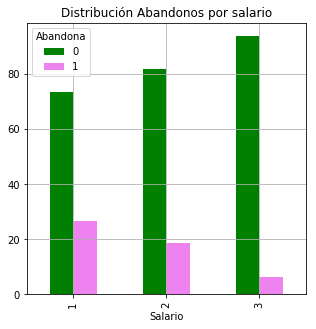

In [17]:
Tabla_Modelar.groupby(['Salario','Abandona']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, grid=True, table=False, figsize=(5,5), color=('green','violet')).set_title('Distribución Abandonos por salario')

plt.show()

Se observa que en general el que cobra menos tiene mas chances de irse...

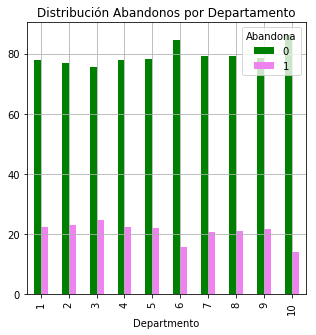

In [18]:
Tabla_Modelar.groupby(['Departmento','Abandona']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, grid=True, table=False, figsize=(5,5), color=('green','violet')).set_title('Distribución Abandonos por Departamento')

plt.show()

Se observa que el departamento 3 (RRHH) es el que mas gente tiene que abandona. El 6 (Administracion) y 10 (Otro) abandonan por debajo de lo normal.

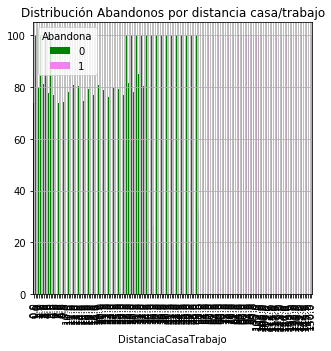

In [19]:
Tabla_Modelar.groupby(['DistanciaCasaTrabajo','Abandona']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, grid=True, table=False, figsize=(5,5), color=('green','violet')).set_title('Distribución Abandonos por distancia casa/trabajo')

plt.show()

In [20]:
#Como la distancia de la casa al trabajo es dificil de leer, genero las distancias agrupadas por ejemplo:
# distancia de 0 a 15 = 15, distancia de 16 a 30 = 30, distancia de 31 a 45 =45... etc
#Genero la variable (columnaDistanciaCasaTrabajo_BIN que 
Tabla_Modelar['DistanciaCasaTrabajo_BIN'] = pd.cut(x=Tabla_Modelar['DistanciaCasaTrabajo'], bins=[0,15,30,45,60,75,90,105,120,135,150], labels=[15, 30, 45, 60, 75, 90, 105, 120, 135, 150])
Tabla_Modelar.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,Sexo,DistanciaCasaTrabajo,Abandona,DistanciaCasaTrabajo_BIN
0,1,0.38,0.53,2,157,3,0,0,1,1,1,66.0,1,75
1,2,0.80,0.86,5,262,6,0,0,1,2,2,70.5,1,75
2,3,0.11,0.88,7,272,4,0,0,1,2,2,15.0,1,15
3,4,0.72,0.87,5,223,5,0,0,1,1,1,114.0,1,120
4,5,0.37,0.52,2,159,3,0,0,1,1,2,78.0,1,90


In [21]:
 print(Tabla_Modelar.shape)

(13000, 14)


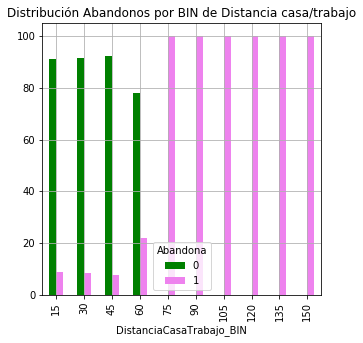

In [22]:
#ahora chequeo 
Tabla_Modelar.groupby(['DistanciaCasaTrabajo_BIN','Abandona']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, grid=True, table=False, figsize=(5,5), color=('green','violet')).set_title('Distribución Abandonos por BIN de Distancia casa/trabajo')

plt.show()

podemos observar que la gente que vive lejos abandona con mayor facilidad

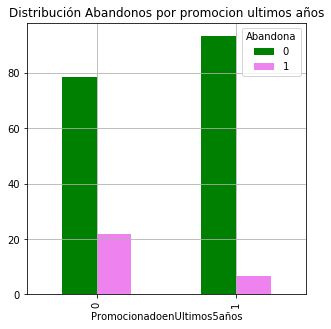

In [23]:
Tabla_Modelar.groupby(['PromocionadoenUltimos5años','Abandona']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, grid=True, table=False, figsize=(5,5), color=('green','violet')).set_title('Distribución Abandonos por promocion ultimos años')

plt.show()

Los no promocionados ultimamente abandonan más su trabajo

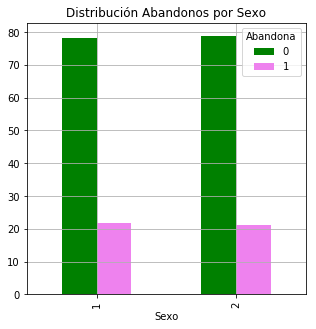

In [24]:
Tabla_Modelar.groupby(['Sexo','Abandona']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=False, grid=True, table=False, figsize=(5,5), color=('green','violet')).set_title('Distribución Abandonos por Sexo')

plt.show()

El sexo no afecta mucho en el abadono...

podriamos porbar otros ejemplos...

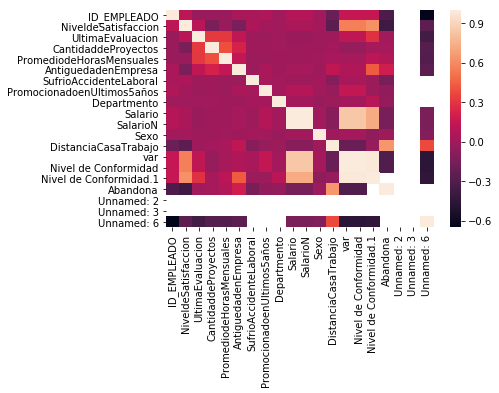

In [71]:
#Ejemplo de correlacion con Seaborn:
import seaborn as sns
corr = Tabla_Modelar.corr() #por default usa pearson
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Algunas observaciones:
1. La distancia al trabajo esta correlacionada con el abandono.
2. la cantidad de proyectos con el promedio de hora tambien (podriamos pensar que los que tienen mas proyectos deben trabajar mas tiempo).
3. La antiguedad en la empresa parece que tiene algo de correlacion con el abandono tambien.

In [26]:
#elimino la variable Bin distancia
Tabla_Modelar = Tabla_Modelar.drop('DistanciaCasaTrabajo_BIN', 1)
Tabla_Modelar.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,Sexo,DistanciaCasaTrabajo,Abandona
0,1,0.38,0.53,2,157,3,0,0,1,1,1,66.0,1
1,2,0.80,0.86,5,262,6,0,0,1,2,2,70.5,1
2,3,0.11,0.88,7,272,4,0,0,1,2,2,15.0,1
3,4,0.72,0.87,5,223,5,0,0,1,1,1,114.0,1
4,5,0.37,0.52,2,159,3,0,0,1,1,2,78.0,1


# Genero en la Tabla_Apredecir las mismas variables que en la Tabla_Modelar

In [72]:
Tabla_Apredecir.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,SalarioN,Sexo,DistanciaCasaTrabajo,Var,Nivel de Conformidad,Nivel de Conformidad.1
0,13001,0.62,0.94,4,252,4,0,0,Contador,Bajo,-1,Femenino,26.5,1.8135,2.571716,3
1,13002,0.38,0.52,2,171,3,0,0,Contador,Medio,0,Masculino,39.5,2.9805,3.510762,4
2,13003,0.80,0.77,4,194,3,0,0,Contador,Medio,0,Femenino,34.5,5.3355,5.405753,5
3,13004,0.61,0.42,3,104,2,0,0,RRHH,Medio,0,Femenino,24.0,3.8460,4.207202,4
4,13005,0.61,0.56,4,176,3,0,0,RRHH,Medio,0,Femenino,39.5,4.1705,4.468316,4


In [73]:
Tabla_Apredecir.isnull().any().any() #busco si existen nulos

False

No hay nulos en la tabla a predecir.

In [74]:
#busco datos unicos para cada variable no numerica:
Tabla_Apredecir['Departmento'].unique()

array(['Contador', 'RRHH', 'Tecnico', 'Soporte', 'Administracion', 'IT',
       'ManagerdeProducto', 'Otro', 'Marketing', 'Ventas'], dtype=object)

In [75]:
Tabla_Apredecir['Salario'].unique()

array(['Bajo', 'Medio', 'Alto'], dtype=object)

In [76]:
Tabla_Apredecir['Sexo'].unique()

array(['Femenino', 'Masculino'], dtype=object)

compruebo que la tabla test no tiene datos nuevos...

In [77]:
#Genero la variable (columna) DistanciaCasaTrabajo_BIN para la Tabla Apredecir
Tabla_Apredecir['DistanciaCasaTrabajo_BIN'] = pd.cut(x=Tabla_Apredecir['DistanciaCasaTrabajo'], bins=[0,15,30,45,60,75,90,105,120,135,150], labels=[15, 30, 45, 60, 75, 90, 105, 120, 135, 150])
Tabla_Apredecir.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,SalarioN,Sexo,DistanciaCasaTrabajo,Var,Nivel de Conformidad,Nivel de Conformidad.1,DistanciaCasaTrabajo_BIN
0,13001,0.62,0.94,4,252,4,0,0,Contador,Bajo,-1,Femenino,26.5,1.8135,2.571716,3,30
1,13002,0.38,0.52,2,171,3,0,0,Contador,Medio,0,Masculino,39.5,2.9805,3.510762,4,45
2,13003,0.80,0.77,4,194,3,0,0,Contador,Medio,0,Femenino,34.5,5.3355,5.405753,5,45
3,13004,0.61,0.42,3,104,2,0,0,RRHH,Medio,0,Femenino,24.0,3.8460,4.207202,4,30
4,13005,0.61,0.56,4,176,3,0,0,RRHH,Medio,0,Femenino,39.5,4.1705,4.468316,4,45


In [78]:
#Paso los datos categoricos (de palabras/Letras) a Numeros para cada valor posible que fue
#buscado arriba como dato unico para cada variable(columna):

Tabla_Apredecir.Sexo = Tabla_Apredecir.Sexo.replace({'Masculino': 1, 'Femenino': 2})
Tabla_Apredecir.Salario = Tabla_Apredecir.Salario.replace({'Bajo': 1, 'Medio': 2, 'Alto': 3})
Tabla_Apredecir.Departmento = Tabla_Apredecir.Departmento.replace({'Ventas': 1, 'Contador': 2, 'RRHH': 3, 'Tecnico': 4, 'Soporte': 5, 'Administracion': 6, 'IT': 7, 'ManagerdeProducto': 8, 'Marketing': 9, 'Otro': 10})

Tabla_Apredecir.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,SalarioN,Sexo,DistanciaCasaTrabajo,Var,Nivel de Conformidad,Nivel de Conformidad.1,DistanciaCasaTrabajo_BIN
0,13001,0.62,0.94,4,252,4,0,0,2,1,-1,2,26.5,1.8135,2.571716,3,30
1,13002,0.38,0.52,2,171,3,0,0,2,2,0,1,39.5,2.9805,3.510762,4,45
2,13003,0.80,0.77,4,194,3,0,0,2,2,0,2,34.5,5.3355,5.405753,5,45
3,13004,0.61,0.42,3,104,2,0,0,3,2,0,2,24.0,3.8460,4.207202,4,30
4,13005,0.61,0.56,4,176,3,0,0,3,2,0,2,39.5,4.1705,4.468316,4,45


In [79]:
#elimino la variable Bin distancia
Tabla_Apredecir = Tabla_Apredecir.drop('DistanciaCasaTrabajo_BIN', 1)
Tabla_Apredecir.head()

,ID_EMPLEADO,NiveldeSatisfaccion,UltimaEvaluacion,CantidaddeProyectos,PromediodeHorasMensuales,AntiguedadenEmpresa,SufrioAccidenteLaboral,PromocionadoenUltimos5años,Departmento,Salario,SalarioN,Sexo,DistanciaCasaTrabajo,Var,Nivel de Conformidad,Nivel de Conformidad.1
0,13001,0.62,0.94,4,252,4,0,0,2,1,-1,2,26.5,1.8135,2.571716,3
1,13002,0.38,0.52,2,171,3,0,0,2,2,0,1,39.5,2.9805,3.510762,4
2,13003,0.80,0.77,4,194,3,0,0,2,2,0,2,34.5,5.3355,5.405753,5
3,13004,0.61,0.42,3,104,2,0,0,3,2,0,2,24.0,3.8460,4.207202,4
4,13005,0.61,0.56,4,176,3,0,0,3,2,0,2,39.5,4.1705,4.468316,4


In [80]:
print(Tabla_Apredecir.shape)

(1999, 16)


# Ahora entreno los modelos con la Tabla a modelar:

### k-means:

In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [82]:
print(Tabla_Modelar.columns)

Index(['ID_EMPLEADO', 'NiveldeSatisfaccion', 'UltimaEvaluacion',
       'CantidaddeProyectos', 'PromediodeHorasMensuales',
       'AntiguedadenEmpresa', 'SufrioAccidenteLaboral',
       'PromocionadoenUltimos5años', 'Departmento', 'Salario', 'SalarioN',
       'Sexo', 'DistanciaCasaTrabajo', 'var', 'Nivel de Conformidad',
       'Nivel de Conformidad.1', 'Abandona', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')


In [83]:
x = np.array(Tabla_Modelar.iloc[:,0:15])
y = np.array(Tabla_Modelar['Abandona'])

In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

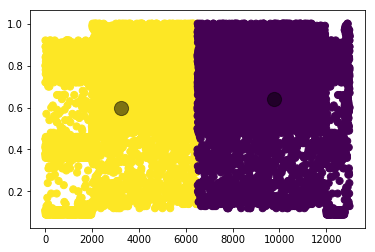

In [85]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Predigo si abandona la gente de Tabla_Apredecir con lo modelado con Tabla_Modelar usando K-means

In [86]:
#predigo TEST:
X_TEST = np.array(Tabla_Apredecir.iloc[:,0:15])
X_TEST

array([[ 1.30010000e+04,  6.20000000e-01,  9.40000000e-01, ...,
         2.65000000e+01,  1.81350000e+00,  2.57171595e+00],
       [ 1.30020000e+04,  3.80000000e-01,  5.20000000e-01, ...,
         3.95000000e+01,  2.98050000e+00,  3.51076242e+00],
       [ 1.30030000e+04,  8.00000000e-01,  7.70000000e-01, ...,
         3.45000000e+01,  5.33550000e+00,  5.40575337e+00],
       ...,
       [ 1.49970000e+04,  3.70000000e-01,  5.30000000e-01, ...,
         1.48500000e+02, -1.68500000e-01,  9.76865822e-01],
       [ 1.49980000e+04,  1.10000000e-01,  9.60000000e-01, ...,
         3.00000000e+00, -6.93000000e-01,  5.54817944e-01],
       [ 1.49990000e+04,  3.70000000e-01,  5.20000000e-01, ...,
         9.30000000e+01, -1.23000000e-01,  1.01347817e+00]])

In [87]:
#predigo con k-means
Clasificacion = kmeans.predict(X_TEST)
print(Clasificacion)

[0 0 0 ... 0 0 0]


In [88]:
#guardo la prediccion
Clasificacion_kmeans = pd.DataFrame(Clasificacion, columns=['Abandona']).to_csv('d:/LNAB/3er Trimestre/predictionkmeansJoaquin.csv')

# Arbol de decision - Modelo con Tabla_Modelar

In [89]:
# Load libraries
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [90]:
X = np.array(Tabla_Modelar.iloc[:,0:15])
Y = np.array(Tabla_Modelar['Abandona'])

In [93]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [94]:
#Creo el arbol de decision como modelo
Modelo_Arbol = DecisionTreeClassifier()

# Con la Tabla_Modelar el arbol busca patrones
Modelo_Arbol = Modelo_Arbol.fit(X_train,y_train)

# Con la parte de test (ese 30% del total de los datos de la Tabla_Modelar), el arbol predice quien Abandona y quien no.
y_pred = Modelo_Arbol.predict(X_test)

In [95]:
# Evaluo que tan bien el modelo predijo para ese 30% (que ya sabemos si abandono o no, por eso puedo evaluarlo)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9997435897435898


### Predigo si abandona la gente de Tabla_Apredecir con lo modelado con Tabla_Modelar usando un Arbol de Decision:

In [96]:
#predigo con Arbol de decision
Clasificacion = Modelo_Arbol.predict(X_TEST)
print(Clasificacion)

[0 0 0 ... 0 0 0]


In [97]:
#guardo la prediccion
Clasificacion_Arbol = pd.DataFrame(Clasificacion, columns=['Abandona']).to_csv('D:/LNAB/3er Trimestre/predictionArboljoaquin.csv')

# Regresion Logistica - Modelo con Tabla_Modelar

In [98]:
#Importo métricas para evaluar el proyecto
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score, classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importo Modelo de Regresión Logistica
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # Import train_test_split function

In [99]:
#Creo el arbol de decision como modelo
logmodel = LogisticRegression()

# Con la Tabla_Modelar el arbol busca patrones
Modelo_Regresion_Logistica = logmodel.fit(X_train,y_train)

# Con la parte de test (ese 30% del total de los datos de la Tabla_Modelar), el arbol predice quien Abandona y quien no.
y_pred = Modelo_Regresion_Logistica.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [100]:
# Evaluo que tan bien el modelo predijo para ese 30% (que ya sabemos si abandono o no, por eso puedo evaluarlo)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.91


### Predigo si abandona la gente de Tabla_Apredecir con lo modelado con Tabla_Modelar usando una Regresion Logistica:

In [101]:
#predigo con Arbol de decision
Clasificacion = Modelo_Regresion_Logistica.predict(X_TEST)
print(Clasificacion)

[0 0 0 ... 1 0 1]


In [102]:
#guardo la prediccion
Clasificacion_RegresionLogistica = pd.DataFrame(Clasificacion, columns=['Abandona']).to_csv('D:/LNAB/3er Trimestre/predictionRegresionLogisticajoaquin.csv')